In [1]:
#Find data that shows rice production by regions or country
#Barchart that shows rice production by country
# create a consumption by region barchart
# Consumption by region per year
# Line charts
# Look for corelations
# Yearly temperatures by region
# Look for corelation between temperature and production 

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
# Import the requests library.
import requests
import random
import json
# Import the API key.
from config import weather_api_key
#import config
from config import g_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
years = ['1961', '1962', '1963', '1964','1965','1966', '1967', '1968', '1969', '1970',
        '1971', '1972', '1973', '1974','1975','1976', '1977', '1978', '1979', '1980',
        '1981', '1982', '1983', '1984','1985','1986', '1987', '1988', '1989', '1990',
        '1991', '1992', '1993', '1994','1995', '1996','1997', '1998', '1999', '2000',
        '2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013', '2014','2015','2016', '2017']
pd.set_option("display.float_format",lambda x: "%.3f" % x)

In [4]:
world_countries_df = pd.read_csv("world_countries.csv")
world_countries_df.head(20)
world_countries = list(world_countries_df["Country Name"])

In [5]:
world_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Democratic Republic of Congo(DRC)',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire ",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 '

In [6]:
import pycountry

In [7]:
import nltk
#nltk.download('punkt')

In [8]:
from nltk.tokenize import word_tokenize
import spacy
nlp = spacy.load("en_core_web_lg")
def similar(name_a,name_b):
    if name_a == name_b:
        return 1.0
    w1 = nlp(name_a)
    w2 = nlp(name_b)
    
    w1_nouns = " ".join([token.lemma_ for token in w1 if token.pos_ == "PROPN"])
    w2_nouns = " ".join([token.lemma_ for token in w2 if token.pos_ == "PROPN"])
    return nlp(w1_nouns).similarity(nlp(w2_nouns))
    
    #print(f"{w1_nouns} and {w2_nouns} NOUNS: {nlp(w1_nouns).similarity(nlp(w2_nouns))}")
print(similar("China","People's Republic of China"))
print(similar("China","Korea"))


0.8874588545790757
0.6633043512321285


In [9]:
country_tokens = {}
for country_name in world_countries:
    w1 = nlp(country_name)
    w1_nouns = " ".join([token.lemma_ for token in w1 if token.pos_ == "PROPN"])
    country_tokens[country_name] = nlp(w1_nouns)
    

In [10]:
# Create similarity score function to find countries that are named diffently
"""
def similar(name_a,name_b):
    if name_a == name_b:
        return 1.0
    count = 0
    for letter in name_b:
        if letter in name_a:
            count += 1
    ratio = count/len(name_b)
    if name_a in name_b:
        ratio = ratio +1
    ratio = ratio/2
    return ratio
    """
""""
def similar(name_a,name_b):
    if name_a == name_b:
        return 1.0
    name_a = name_a.lower().replace(","," ")
    name_b = name_b.lower().replace(","," ")
    a_words = set(name_a.split())
    b_words = set(name_b.split())
    #count = len(a_words.intersection(b_words))
    count = 0 
    for word_a in a_words:
        for word_b in b_words:
            if word_a in word_b or word_b in word_a:
                count += 1
    ratio = count/max(len(a_words),len(b_words))
    return ratio
print(similar("China","People's Republic of China"))
print(similar("China","Korea"))
"""

'"\ndef similar(name_a,name_b):\n    if name_a == name_b:\n        return 1.0\n    name_a = name_a.lower().replace(","," ")\n    name_b = name_b.lower().replace(","," ")\n    a_words = set(name_a.split())\n    b_words = set(name_b.split())\n    #count = len(a_words.intersection(b_words))\n    count = 0 \n    for word_a in a_words:\n        for word_b in b_words:\n            if word_a in word_b or word_b in word_a:\n                count += 1\n    ratio = count/max(len(a_words),len(b_words))\n    return ratio\nprint(similar("China","People\'s Republic of China"))\nprint(similar("China","Korea"))\n'

In [11]:
def get_closest(name,name_list):
    top_score = 0
    top_name = None
    for country in name_list:
        score = similar(country,name)
        if score > top_score:
            top_score = score
            top_name = country
    return top_name
test_countries = ["Korea","Japan","China"]
print(get_closest("People's Republic of China",test_countries))

China


In [12]:
def get_closest(name, name_l):
    w1 = nlp(name)
    w1_nouns = " ".join([token.lemma_ for token in w1 if token.pos_ == "PROPN"])
    w1 = nlp(w1_nouns)
    top_score = 0
    top_name = None
    for country, tokens in country_tokens.items():
        score = w1.similarity(tokens)
        if score > top_score:
            top_score = score
            top_name = country
    return top_name
        

In [13]:
#pycountry.countries.search_fuzzy("africa eastern and southern")

In [14]:
#pycountry.countries.search_fuzzy("Serbia")

In [15]:
intervention = {"Channel Islands": "",
                "Congo, Dem. Rep.": "Congo, The Democratic Republic of the",
                "Congo, Rep.": "Republic of the Congo",
                "Egypt, Arab Rep.": "Arab Republic of Egypt",
                "Hong Kong SAR, China": "Hong Kong",
                "Iran, Islamic Rep.": "Iran, Islamic Republic of",
                "St. Kitts and Nevis": "Saint Kitts and Nevis",
                "Korea, Rep.": "Korea, Republic of",
                "Lao PDR": "Lao People's Democratic Republic",
                "St. Lucia": "Saint Lucia",
                "St. Martin": "Saint Martin (French part)",
                "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
                "South Asia": "",
                "Turkiye": "Republic of Turkey",
                "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
                "Venezuela, RB": "Venezuela, Bolivarian Republic of",
                "Virgin Islands (U.S.)": "Virgin Islands of the United States",
                "Yemen, Rep.": "Republic of Yemen",
                "Democratic Republic of Congo(DRC)": "Congo, The Democratic Republic of the",
                "Macedonia, the Former Yugoslav Republic of": "North Macedonia",
                "Saint Bartholemy": "Saint Batholemy",
                "Swaziland": "Eswatini",
                "Guadeloupe": "Guadeloupe",
                "Niger": "Niger",
                "Martinique": "Martinique",
                "Yugoslav SFR": "",  
                "Curacao": "Curacao",
                "Vietnam": "Vietnam",
                "Viet Nam": "Vietnam",
                "Kosovo": "Kosovo",
                "Burma": "Myanmar",
                "East Timor": "Timor-Leste",
                "Laos": "Lao People's Democratic Republic",
                "Macau": "",
                "U.S. Virgin Islands": "Virgin Islands of the United States",
                "Serbia and Montenegro": "Serbia",
                "Wallis and Futuna Islands": "",
                "Sint Maarten": "Sint Maarten",
                "China, Hong Kong": "Hong Kong",
                "China, Hong Kong SAR": "Hong Kong",
                "China, Taiwan": "Taiwan, Province of China",
                "China, Taiwan Province of": "Taiwan, Province of China",
                "Iran (Islamic Republic of)": 'Iran, Islamic Republic of',
                "Republic of Korea": "Korea, Republic of",
                "Democratic Republic of the Congo": "Congo, The Democratic Republic of the",
                "Venezuela(Bolivarian Republic of)": "Venezuela, Bolivarian Republic of",
                "Venezuela (Bolivarian Republic of)": "Venezuela, Bolivarian Republic of",
                "Democratic People's Republic of Korea": "Korea, Democratic People's Republic of",
                "World": ""}
def get_closest(name, name_list = None):
   
    name = name.strip()
    if name in intervention:
        return intervention[name]
    
    try:
        if name is None:
            return "None"
        names = pycountry.countries.search_fuzzy(name)
        if len(names) > 0:
            return names[0].name
        return "Not Found"
    except LookupError as e:
        try:
            w1 = nlp(name.lower())
            w1_nouns = " ".join([token.lemma_ for token in w1 if token.pos_ == "PROPN"])
            names = pycountry.countries.search_fuzzy(w1_nouns)
            if len(names) > 0:
                return names[0].name
        except LookupError as e:
        
            print(f'"{name}": "",')
        
            

In [16]:
def fix_countries(df, country_col):
    old_names = pd.Series(df[country_col].unique())
    new_names = old_names.apply(lambda x:get_closest(x,world_countries))
    #make dictionary with old names as keys and new names as values
    names = {}
    for a,b in zip(old_names,new_names):
        names[a]= b
    #apply the dictionary to change the names and return the results
    return df[country_col].apply(lambda x:names[x])
    

In [17]:
world_countries_df["Country Name"] = world_countries_df["Country Name"].apply(lambda x:get_closest(x,world_countries))
#f = world_countries_df["New Names"]!= world_countries_df["Country Name"]
#world_countries_df[f][["New Names","Country Name"]]

In [18]:
country_names = []
for i in range(len(years)):
    country_names.extend(list(world_countries_df["Country Name"]))
country_names.sort()
all_data_df = pd.DataFrame({"Country Name":country_names,"Year":years*len(world_countries_df["Country Name"])})
all_data_df.head()

,Country Name,Year
0,Afghanistan,1961
1,Afghanistan,1962
2,Afghanistan,1963
3,Afghanistan,1964
4,Afghanistan,1965


In [19]:
world_pop_df = pd.read_csv("World_Pop_Data.csv",header=4)
world_pop_df.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208,55434,56234,56699,57029,57357,...,102565.000,103165.000,103776.000,104339.000,104865.000,105361.000,105846.000,106310.000,106766.000,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378.000,32269592.000,33370804.000,34413603.000,35383028.000,36296111.000,37171922.000,38041757.000,38928341.000,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,25107925.000,26015786.000,26941773.000,27884380.000,28842482.000,29816769.000,30809787.000,31825299.000,32866268.000,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401.000,2895092.000,2889104.000,2880703.000,2876101.000,2873457.000,2866376.000,2854191.000,2837849.000,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13410,14378,15379,16407,17466,18542,...,82427.000,80770.000,79213.000,77993.000,77295.000,76997.000,77008.000,77146.000,77265.000,NaN
5,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,92417,100801,112112,125130,138049,149855,...,9141598.000,9197908.000,9214182.000,9262896.000,9360975.000,9487206.000,9630966.000,9770526.000,9890400.000,NaN
6,Argentina,ARG,"Population, total",SP.POP.TOTL,20481781,20817270,21153042,21488916,21824427,22159644,...,41733271.000,42202935.000,42669500.000,43131966.000,43590368.000,44044811.000,44494502.000,44938712.000,45376763.000,NaN
7,Armenia,ARM,"Population, total",SP.POP.TOTL,1874119,1941498,2009524,2077584,2145004,2211316,...,2884239.000,2897593.000,2912403.000,2925559.000,2936147.000,2944789.000,2951741.000,2957728.000,2963234.000,NaN
8,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127,20605,21246,22029,22850,23675,...,55669.000,55717.000,55791.000,55806.000,55739.000,55617.000,55461.000,55312.000,55197.000,NaN
9,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,54132,55005,55849,56701,57641,58699,...,90407.000,91510.000,92562.000,93571.000,94520.000,95425.000,96282.000,97115.000,97928.000,NaN


In [20]:
world_countries_df["Country Name"] = world_countries_df["Country Name"].apply(lambda x:get_closest(x,world_countries))
#f = world_countries_df["New Names"]!= world_countries_df["Country Name"]
#world_countries_df[f][["New Names","Country Name"]]

"Saint Batholemy": "",


In [21]:
world_pop_df["Country Name"] = world_pop_df["Country Name"].apply(lambda x:get_closest(x,world_countries))
#f = world_pop_df["New Names"]!= world_pop_df["Country Name"]
#world_pop_df[f][["New Names","Country Name"]]

In [22]:
pop_df = pd.melt(world_pop_df,id_vars=['Country Name'], value_vars = years, var_name = 'Year', value_name = 'Population')
pop_df = pop_df.sort_values(by = ["Year", "Country Name"])
all_data_df.sort_values(by = ["Year", "Country Name"])


all_data_df = all_data_df.merge(pop_df,how="left",on = ["Country Name","Year"])
all_data_df["Population"] = pd.to_numeric(all_data_df["Population"],errors ="coerce")
all_data_df

,Country Name,Year,Population
0,Afghanistan,1961,9169406.000
1,Afghanistan,1962,9351442.000
2,Afghanistan,1963,9543200.000
3,Afghanistan,1964,9744772.000
4,Afghanistan,1965,9956318.000
...,...,...,...
13789,Zimbabwe,2013,13350378.000
13790,Zimbabwe,2014,13586710.000
13791,Zimbabwe,2015,13814642.000
13792,Zimbabwe,2016,14030338.000


In [23]:
#country_tokens["Aruba"]

In [24]:
"""
z = nlp("Zimbabwe")
x = nlp("Angola")
z.similarity(x)

"""

'\nz = nlp("Zimbabwe")\nx = nlp("Angola")\nz.similarity(x)\n\n'

In [25]:
len(world_pop_df)

212

In [26]:
#f = world_pop_df["Country Name"].str.startswith("Venezuela")
#world_pop_df[f]

In [27]:
#f = world_pop_df["Country Name"].str.startswith("United")
#world_pop_df[f]

In [28]:
rice_data_df = pd.read_csv("Rice_data.csv",encoding = "ISO-8859-1")
rice_data_df.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,27,"Rice, paddy",1961,1961,hg/ha,15190.000,Fc,Calculated data
1,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,27,"Rice, paddy",1962,1962,hg/ha,15190.000,Fc,Calculated data
2,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,27,"Rice, paddy",1963,1963,hg/ha,15190.000,Fc,Calculated data
3,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,27,"Rice, paddy",1964,1964,hg/ha,17273.000,Fc,Calculated data
4,QCL,Crops and livestock products,2,Afghanistan,5419,Yield,27,"Rice, paddy",1965,1965,hg/ha,17273.000,Fc,Calculated data


In [29]:
len(rice_data_df["Area"].unique())

148

In [30]:
""" #Example of how to change a lot of row values using a filter
f = rice_data_df["Area"].str.startswith("Venezuela")
rice_data_df.loc[f, "Area"] = "Venezuela"
rice_data_df[f]
"""

' #Example of how to change a lot of row values using a filter\nf = rice_data_df["Area"].str.startswith("Venezuela")\nrice_data_df.loc[f, "Area"] = "Venezuela"\nrice_data_df[f]\n'

In [31]:
#rice_countries = set(rice_data_df["Area"])
#pop_countries = set(world_pop_df["Country Name"])
#rice_countries.difference(pop_countries)
#pop_countries.difference(rice_countries)

In [32]:
# remove extra columns
rice_data_df = rice_data_df.drop(['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code', 'Item Code (FAO)', 'Year Code', 'Flag', 'Flag Description'],axis =1)

In [33]:
f = (rice_data_df["Year"] > 1960) & (rice_data_df["Year"] < 2018)
rice_data_df = rice_data_df[f]

In [34]:
f = (rice_data_df["Element"] == "Yield")
rice_yield_df = rice_data_df[f]
f = (rice_data_df["Element"] == "Production")
rice_production_df = rice_data_df[f]

In [35]:
len(rice_production_df["Area"].unique())

130

In [36]:
rice_yield_df

,Area,Element,Item,Year,Unit,Value
0,Afghanistan,Yield,"Rice, paddy",1961,hg/ha,15190.000
1,Afghanistan,Yield,"Rice, paddy",1962,hg/ha,15190.000
2,Afghanistan,Yield,"Rice, paddy",1963,hg/ha,15190.000
3,Afghanistan,Yield,"Rice, paddy",1964,hg/ha,17273.000
4,Afghanistan,Yield,"Rice, paddy",1965,hg/ha,17273.000
...,...,...,...,...,...,...
20901,Zimbabwe,Yield,"Rice, paddy",2013,hg/ha,3997.000
20902,Zimbabwe,Yield,"Rice, paddy",2014,hg/ha,3425.000
20903,Zimbabwe,Yield,"Rice, paddy",2015,hg/ha,3065.000
20904,Zimbabwe,Yield,"Rice, paddy",2016,hg/ha,3429.000


In [37]:
rice_yield_df["Item"].unique()

array(['Rice, paddy'], dtype=object)

In [38]:
rice_production_df[(rice_production_df["Area"] == "Afghanistan") & (rice_production_df["Year"] == 1961)]

,Area,Element,Item,Year,Unit,Value
60,Afghanistan,Production,"Rice, paddy",1961,tonnes,319000.000
120,Afghanistan,Production,"Rice, paddy (rice milled equivalent)",1961,tonnes,212773.000


In [39]:
rice_data_df["Year"].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

In [40]:
rice_data_df["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'China, Hong Kong SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Cuba',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia', 'Fiji',
       'France', 'French Guyana', 'Gabon', 'Gambia', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyr

In [41]:
rice_production_df = rice_production_df[rice_production_df["Item"]=="Rice, paddy"]

In [42]:
rice_production_df = rice_production_df.rename(columns = {'Area':'Area', 'Value':'Production'})
rice_production_df = rice_production_df.drop(["Element","Item","Unit"],axis=1)
rice_production_df

,Area,Year,Production
60,Afghanistan,1961,319000.000
61,Afghanistan,1962,319000.000
62,Afghanistan,1963,319000.000
63,Afghanistan,1964,380000.000
64,Afghanistan,1965,380000.000
...,...,...,...
20961,Zimbabwe,2013,1183.000
20962,Zimbabwe,2014,1286.000
20963,Zimbabwe,2015,1418.000
20964,Zimbabwe,2016,1296.000


In [43]:
#clean up countries that are split into two names e.g Sunda/Sudan forma/Sudan South
#rice_production_df["Country Name"] = rice_production_df["Area"].apply(lambda x:get_closest(x,world_countries))
rice_production_df["Country Name"] = fix_countries(rice_production_df,"Area")

"USSR": "",


In [44]:
f = rice_production_df["Area"]!= rice_production_df["Country Name"]
grouping = rice_production_df[f][["Area","Country Name"]].groupby("Area")
grouping.last()

,Country Name
Area,
Bolivia (Plurinational State of),"Bolivia, Plurinational State of"
"China, Hong Kong SAR",Hong Kong
"China, Taiwan Province of","Taiwan, Province of China"
"China, mainland",China
Democratic People's Republic of Korea,"Korea, Democratic People's Republic of"
Democratic Republic of the Congo,"Congo, The Democratic Republic of the"
French Guyana,Guyana
Iran (Islamic Republic of),"Iran, Islamic Republic of"
Micronesia (Federated States of),"Micronesia, Federated States of"


In [45]:
rice_production_df.drop("Area",axis=1,inplace=True)
rice_production_df.dropna(inplace=True)

Country Name
Sudan    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Production, dtype: object

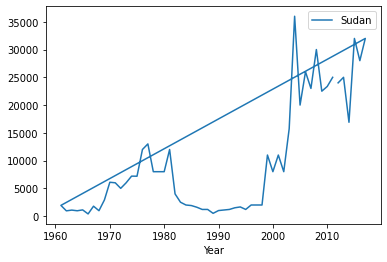

In [46]:
sundan_data = rice_production_df[(rice_production_df["Country Name"].str.contains("Sudan"))]
sundan_data = sundan_data.set_index("Year")
sundan_data.groupby("Country Name")["Production"].plot(legend=True)

In [47]:
sundan_data.groupby("Country Name").count()

,Production
Country Name,
Sudan,57


In [48]:
all_data_df["Year"] = pd.to_numeric(all_data_df["Year"],errors ="coerce")
all_data_df.dtypes

Country Name     object
Year              int64
Population      float64
dtype: object

In [49]:
rice_production_df["Year"] = pd.to_numeric(rice_production_df["Year"],errors ="coerce")
all_data_df = all_data_df.merge(rice_production_df,how="left",on = ["Country Name","Year"])
all_data_df

,Country Name,Year,Population,Production
0,Afghanistan,1961,9169406.000,319000.000
1,Afghanistan,1962,9351442.000,319000.000
2,Afghanistan,1963,9543200.000,319000.000
3,Afghanistan,1964,9744772.000,380000.000
4,Afghanistan,1965,9956318.000,380000.000
...,...,...,...,...
13835,Zimbabwe,2013,13350378.000,1183.000
13836,Zimbabwe,2014,13586710.000,1286.000
13837,Zimbabwe,2015,13814642.000,1418.000
13838,Zimbabwe,2016,14030338.000,1296.000


In [50]:
consumption_rice_df = pd.read_csv("Rice Consumption Per Capita.csv",header=1)
consumption_rice_df.head(20)

,Yearly Data,Units,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Source
0,Afghanistan,kg,20.46,20.04,19.54,23.08,22.55,19.48,22.62,22.45,...,14.960,15.580,16.34,14.270,13.820,19.14847482,15.02312908,15.68548627,19.75418248,Faostat
1,Albania,kg,1.39,1.71,2.97,2.5,3.16,3.15,3.3,3.69,...,7.450,7.560,6.57,6.980,7.780,10.03771411,8.331299686,7.996937521,9.744360191,Faostat
2,Algeria,kg,0.66,0.41,0.39,0.39,0.41,0.33,0.43,0.53,...,2.010,2.760,2.13,2.730,2.970,4.47028555,4.153239955,3.970270026,4.252319701,Faostat
3,Angola,kg,3.01,2.41,3.03,2.68,3.69,3.18,3.41,1.51,...,7.300,7.090,7.27,8.730,8.120,14.17872536,13.98632496,13.86843199,13.41526978,Faostat
4,Argentina,kg,3.68,3.27,4.22,4.82,5.31,1.8,3.55,4.78,...,7.810,8.210,7.81,8.090,8.770,12.88976904,13.33117994,11.99806343,12.12401615,Faostat
5,Armenia,kg,...,...,...,...,...,...,...,...,...,4.270,3.680,3.1,3.080,3.180,3.776949825,3.418150172,3.405824027,3.395829039,Faostat
6,Australia,kg,3.12,2.26,3.1,3.09,3.08,2.41,2.6,2.86,...,11.380,11.610,10.92,10.530,11.030,13.71631909,13.8982226,15.50169243,15.9337546,Faostat
7,Austria,kg,4.18,3.48,3.38,3.55,3.74,4.23,3.66,3.52,...,3.590,3.450,3.68,3.980,3.700,5.265402003,5.322411437,5.379625276,5.45605455,Faostat
8,Azerbaijan,kg,...,...,...,...,...,...,...,...,...,2.500,2.010,2.16,1.800,2.040,1.468262612,0.829072162,1.22978389,1.928144548,Faostat
9,Bahamas,kg,27.91,26.93,25.66,24.22,23.71,23.76,23.55,22.96,...,21.070,20.920,21.11,23.810,23.970,16.18887015,10.68947087,21.16833323,18.33665576,Faostat


In [51]:
consumption_rice_df["Country Name"] = consumption_rice_df["Yearly Data"].apply(lambda x:get_closest(x,world_countries))
f = consumption_rice_df["Yearly Data"]!= consumption_rice_df["Country Name"]
consumption_rice_df[f][["Yearly Data","Country Name"]]

,Yearly Data,Country Name
15,Bolivia,"Bolivia, Plurinational State of"
19,Brunei,Brunei Darussalam
36,North Korea,"Korea, Democratic People's Republic of"
67,Iran,"Iran, Islamic Republic of"
71,Cote d'Ivoire,Côte d'Ivoire
79,Korea,"Korea, Democratic People's Republic of"
87,Macedonia,North Macedonia
97,Moldova,"Moldova, Republic of"
120,Russia,Russian Federation
129,South Korea,"Korea, Republic of"


In [52]:
#rice_consumption_df = pd.wide_to_long(consumption_rice_df,stubnames="",i="Yearly Data",j="Year")
#This didn't format the way we wanted

In [53]:
# Use melt to change columns from wide to long
rice_consumption_df = pd.melt(consumption_rice_df, id_vars=['Country Name'], value_vars= years,
        var_name='Year', value_name='Consumption')
rice_consumption_df

,Country Name,Year,Consumption
0,Afghanistan,1961,20.46
1,Albania,1961,1.39
2,Algeria,1961,0.66
3,Angola,1961,3.01
4,Argentina,1961,3.68
...,...,...,...
9058,Vietnam,2017,218.4657455
9059,Yemen,2017,22.77723387
9060,Zambia,2017,2.136041137
9061,Zimbabwe,2017,4.214489711


In [54]:
rice_consumption_df["Decade"]= (rice_consumption_df["Year"]//10)*10
rice_consumption_df.head

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [ ]:
rice_consumption_df["Region"]= rice_consumption_df

In [ ]:
rc_by_decade = rice_consumption_df.groupby(["Decade","Country Name"]).sum().reset_index()
rc_by_decade.sort_values("Consumption",ascending=False,inplace=True,ignore_index=True)
rc_by_decade.head()

In [ ]:
rc_by_decade_gb = rc_by_decade.groupby("Decade")
rc_by_decade_gb.head(5).sort_values(["Decade","Consumption"])

# rename columns

In [ ]:
#We should combine rice consumption and rice production together first

#How badly do they mismatch?  Let's find out.
#production_countries = set(rice_production_df["Country Name"].unique())
#consumption_countries = set(rice_consumption_df["Country Name"].unique())
#print(len(production_countries))
#print(len(consumption_countries))
#print(len(rice_countries))
#print(production_countries.difference(consumption_countries))



In [ ]:
#set_a = {1, 2, 3, 4}
#set_b = {1, 2, 4}
#set_a.difference(set_b)  #What from set a is missing from set b


In [ ]:
rice_consumption_df["Consumption"].dtype

In [ ]:

rice_consumption_df["Consumption"] = pd.to_numeric(rice_consumption_df["Consumption"],errors ="coerce")

In [ ]:
rice_consumption_df["Year"]=rice_consumption_df["Year"].astype(int)

In [ ]:
all_data_df = all_data_df.merge(rice_consumption_df,how="left",on = ["Country Name","Year"])
all_data_df

In [ ]:
all_data_df["Tons Consumption"] = (all_data_df["Population"].astype(float) *all_data_df["Consumption"].astype(float))*0.00110231

In [ ]:
all_data_df

# Descriptive Statistics: Min Max Avg std

In [ ]:
# Get the descriptive statistics for for the year 1961
all_data_df["Production"].describe()

In [ ]:
#Put the Production in a list
#production = pc_df["Production"].tolist()
#production

In [ ]:
# Calculate the average rice production for Afghanistan 1961 to 2017
#avg_prod_afgan = pc_df.groupby(["Country Name"]=="Afghanistan", ["Prouduction"]).mean() ["Afghanistan_Avg"]
#avg_prod_afganfffff

In [ ]:
df_by_country = all_data_df.groupby("Country Name")
country_means = df_by_country.mean()

In [ ]:
country_means

In [ ]:
max_pop = df_by_country.max()["Population"]
max_pop


In [ ]:
#country_means.loc["Angola"]["Production"]

In [ ]:
#country_means["Production"].loc["Angola"]

In [ ]:
# Here is how to turn country name into a normal column
country_means.reset_index(inplace=True)
country_means

In [ ]:
country_means["Country Name"].unique()

In [ ]:
#this creates an object of the type groupby
df_by_year = all_data_df.groupby("Year")
# a groupby object can be used to make a new dataframe
year_means = df_by_year.mean()
year_means

In [ ]:
year_means["Production"].plot()

In [ ]:
year_means["Tons Consumption"].plot()

In [ ]:
year_means[["Production", "Tons Consumption"]].plot()

In [ ]:
country_means = country_means.fillna(0)

country_means = country_means.sort_values("Production", ascending = False)
country_means

In [ ]:
country_means.head(10)

In [ ]:
country_means.tail(10)

In [ ]:
def get_decade_from_year(year):
    year = int(year/10)*10
    return year

print(get_decade_from_year(1953))

In [ ]:
# Calulate the total rice production for each decade
all_data_df["decade"]= all_data_df["Year"].apply(get_decade_from_year)

In [ ]:
all_data_df

In [ ]:
by_decade = all_data_df.groupby("decade")
mean_by_decade = by_decade.mean()
mean_by_decade["Production"]

In [ ]:
mean_by_decade[["Production","Tons Consumption"]].plot()

In [ ]:
# countries that produced above the average 
countries_above_avg = all_data_df[all_data_df["Production"] >=3.431421e+06]
countries_above_avg

In [ ]:
gdp_df = pd.read_csv("world_gdp.csv",header=4)
gdp_df.head()

In [ ]:
gdp_df["New Names"] = gdp_df["Country Name"].apply(lambda x:get_closest(x,world_countries))
f = gdp_df["New Names"]!= gdp_df["Country Name"]
gdp_df[f][["New Names","Country Name"]]

In [ ]:
gdp_df["Country Name"] = gdp_df["New Names"]

In [ ]:
gdp_df = gdp_df.drop(["Indicator Name","Country Code","Indicator Code","New Names"],axis = 1)
gdp_df.head()

In [ ]:
gdp_df = gdp_df.fillna(0)
gdp_df.head()

In [ ]:
gdp_df.columns

In [ ]:
melted_gdp_df = pd.melt(gdp_df, id_vars=['Country Name'], value_vars= years,
        var_name='Year', value_name='GDP')

melted_gdp_df.head()

In [ ]:
melted_gdp_df.dtypes

In [ ]:
melted_gdp_df["Year"]= melted_gdp_df["Year"].astype(int)

In [ ]:
melted_gdp_df.tail(10)

In [ ]:
all_data_df = all_data_df.merge(melted_gdp_df,how="left",on = ["Country Name","Year"])
all_data_df.head()

In [ ]:
regions_df = pd.read_csv("Geographic_Regions.csv")
regions_df

In [ ]:
regions_df = regions_df.fillna("")
regions_df

In [ ]:
countries_regions = {}
def extract(row):
    region = row[0].strip()
    for i in range(1,len(row)):
        country = row[i].strip()
        if country != "":
            country = get_closest(country)
            countries_regions[country] = region
    return row
regions_df.apply(extract,axis = 1)
print (countries_regions)

In [ ]:
regions_df = pd.DataFrame(data=countries_regions.items(), columns = ["Country Name","Region"])
regions_df.head()

In [ ]:
regions_df["Region"].unique()

In [ ]:
all_data_df = all_data_df.merge(regions_df,how="left",on = "Country Name")
all_data_df.head()

In [ ]:
by_region = all_data_df.groupby(["Region","decade"])
by_region.mean()

In [ ]:
by_region = by_region.fillna("")
by_region

In [ ]:
#this creates an object of the type groupby
#df_by_year = pc_df.groupby("Year")
df_by_gdp = all_data_df.groupby("Year")
# a groupby object can be used to make a new dataframe
#year_means = df_by_year.mean()
gdp_yr_means = df_by_gdp.mean()
#year_means
gdp_yr_means

In [ ]:
gdp_yr_means[["Production"]].plot()
gdp_yr_means[["GDP"]].plot()

In [ ]:
gdp_yr_means.max()

In [ ]:
gdp_yr_means["gdp_norm"] = gdp_yr_means["GDP"]/323651050378.506
gdp_yr_means["production_norm"] = gdp_yr_means["Production"]/ 5343972.353


In [ ]:
gdp_yr_means[["production_norm","gdp_norm"]].plot()

In [ ]:
df_by_cgdp = all_data_df.groupby(["decade","Region"])
# a groupby object can be used to make a new dataframe
#year_means = df_by_year.mean()
gdp_country_means = df_by_cgdp.mean()
#year_means
gdp_country_means

In [ ]:
gdp_country_means.loc[1960][["GDP","Production"]].plot.bar()

In [ ]:
all_data_df.to_csv("rice_all_data.csv")

In [ ]:
all_data_df.columns